In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
import pandas as pd
import sys

from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude
import astropy.units as u

In [4]:
root = '/Users/alin/Documents/'

cat = pd.read_csv(root + 'st_db_input.txt', sep='\t', engine='python')
cat = cat[['id', 'comments', 'catname', 'catID', 'ra', 'dec']]

In [18]:
color_dict = {'ACS':'blue',\
              'WFPC2':'green',\
              'NICMOS':'red',\
              'WFC3':'black'}

costheta = [0.25*np.cos(x) for x in np.arange(0,360,1)]
sintheta = [0.25*np.sin(y) for y in np.arange(0,360,1)]

blah = cat.loc[pd.notnull(cat['comments']) & ~(cat['comments'] == 'o')]

print len(blah)

print blah['comments'].value_counts()

argh = set(blah['id'])

print len(argh)

336
d2    109
d4     60
d5     55
d3     42
d6     42
d7     28
Name: comments, dtype: int64
122


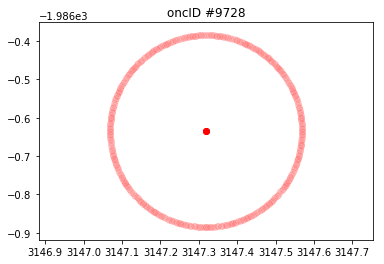

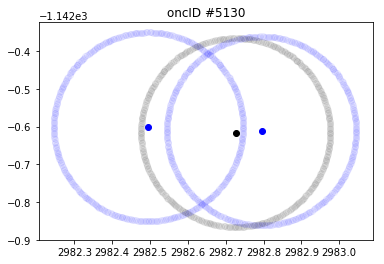

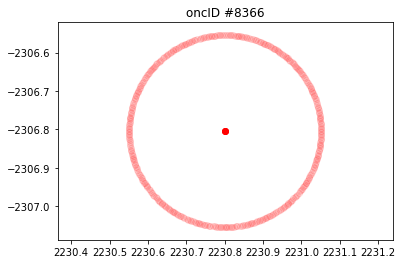

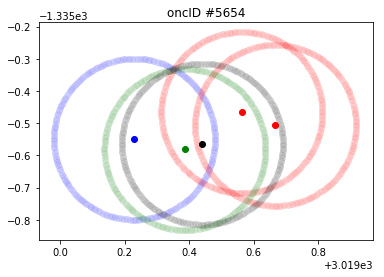

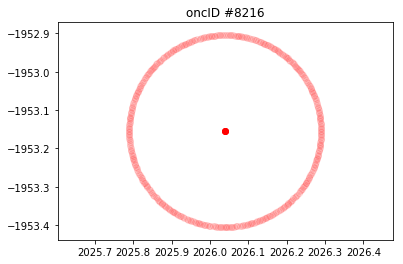

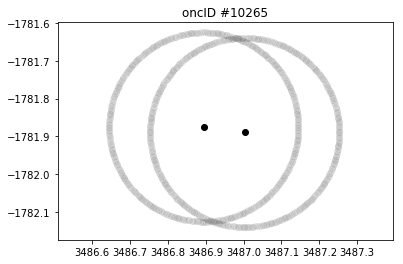

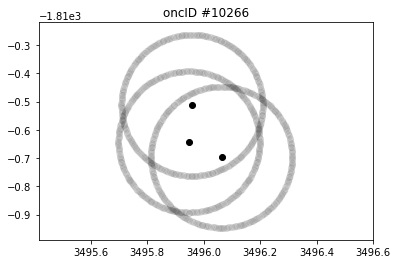

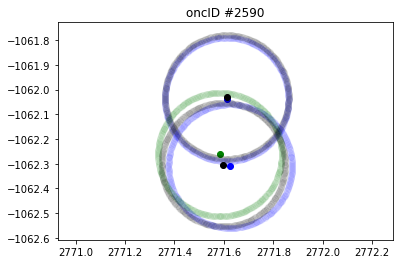

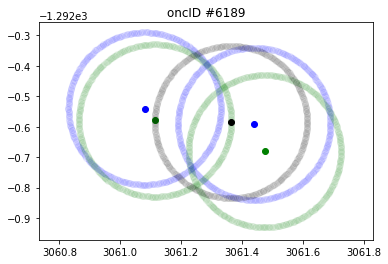

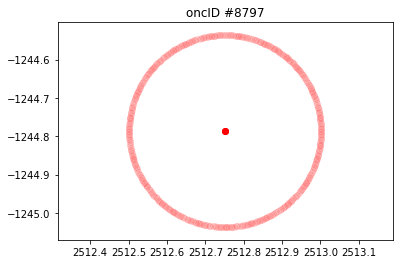

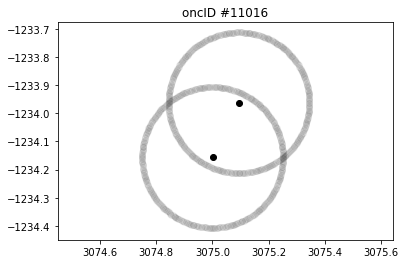

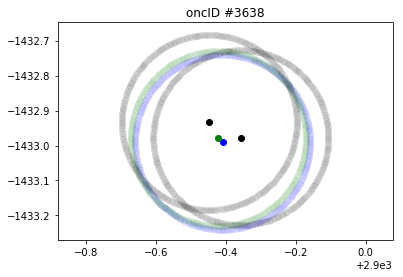

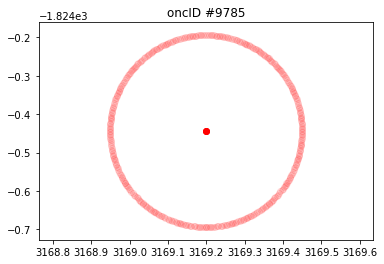

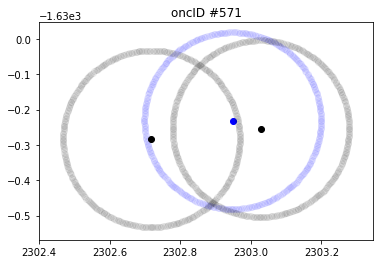

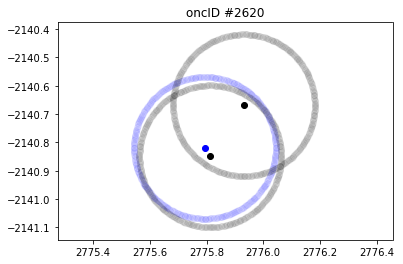

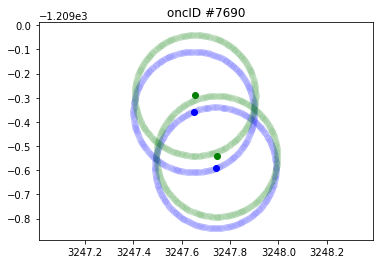

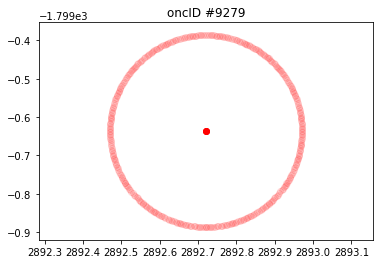

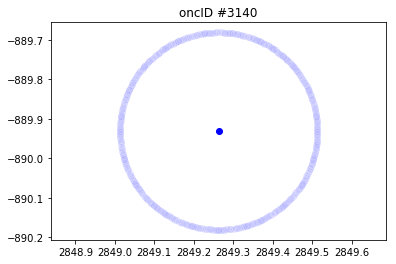

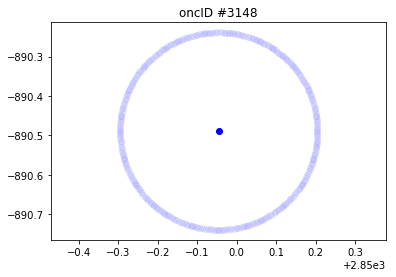

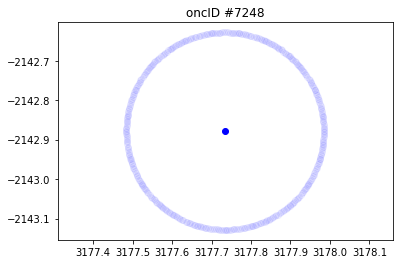

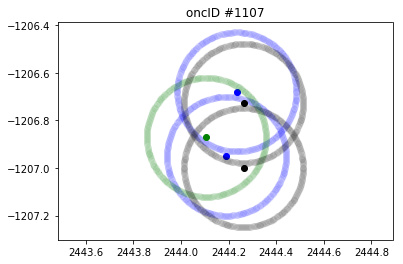

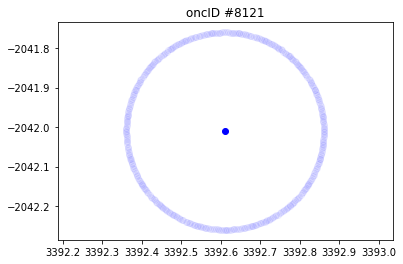

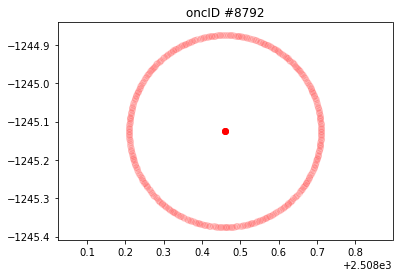

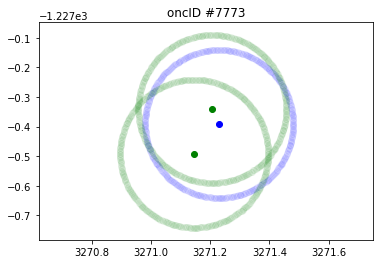

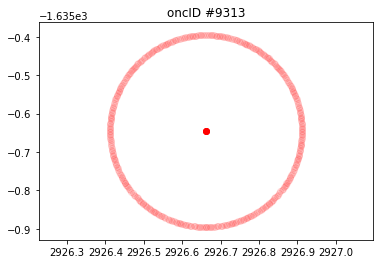

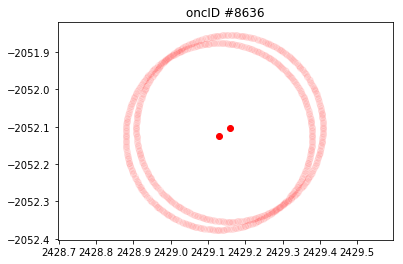

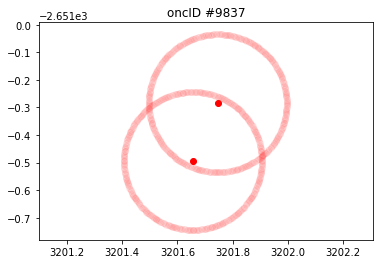

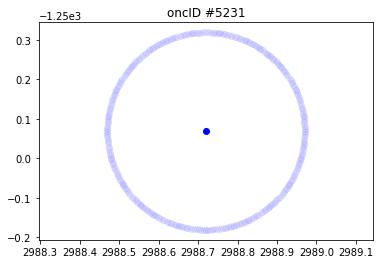

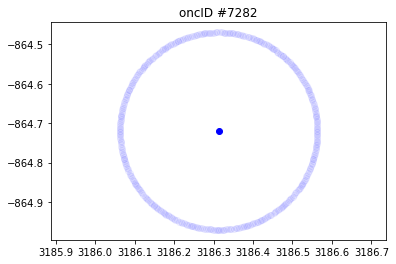

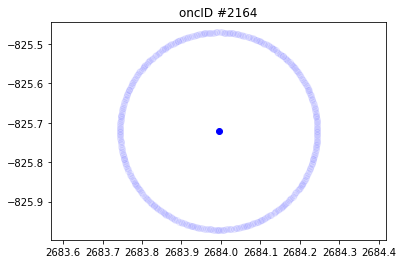

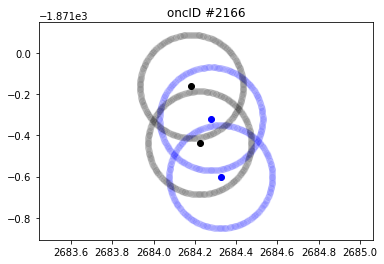

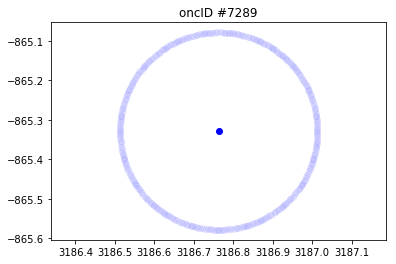

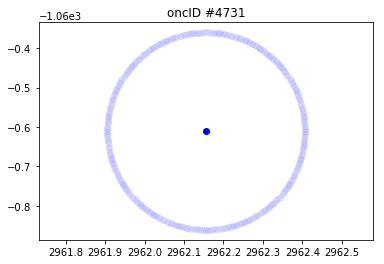

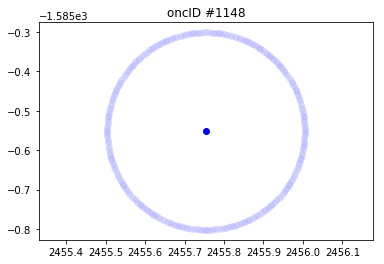

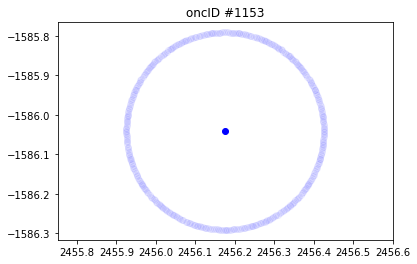

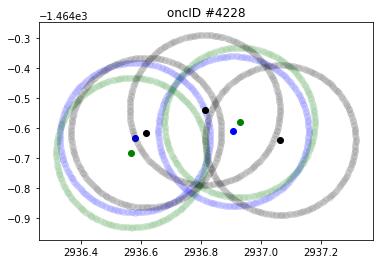

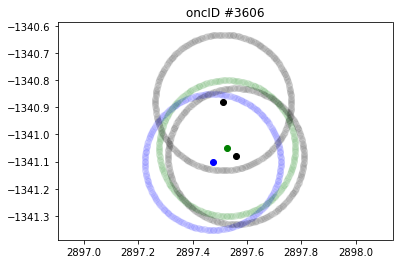

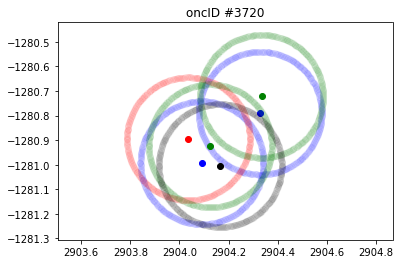

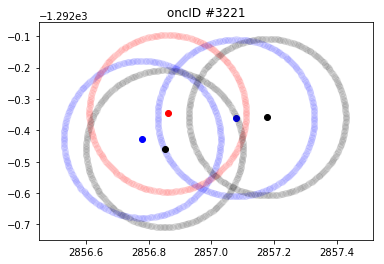

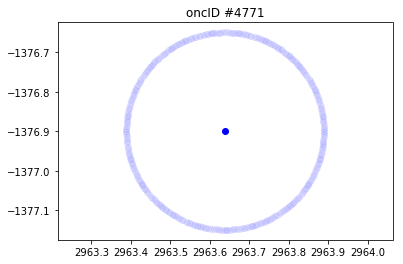

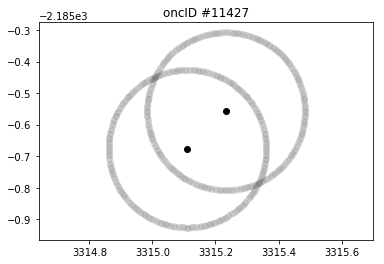

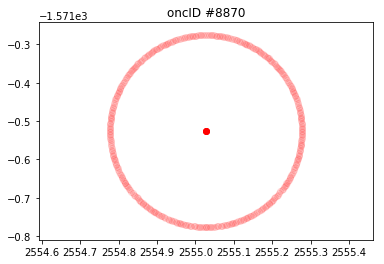

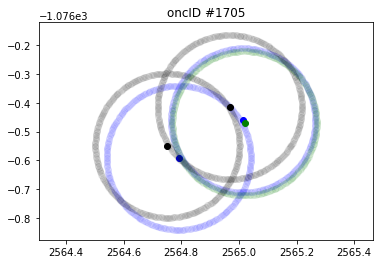

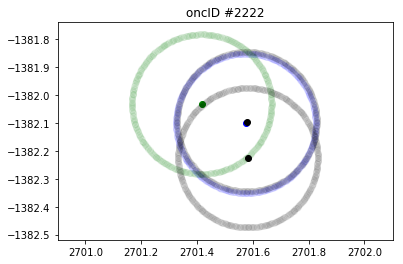

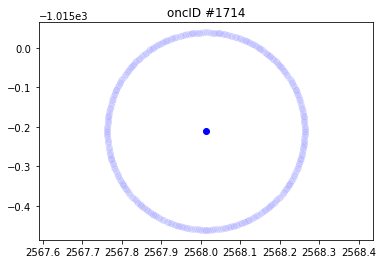

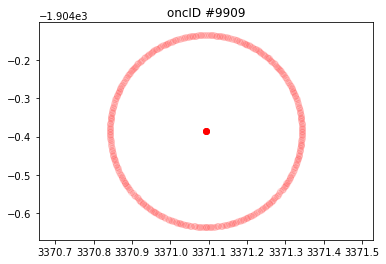

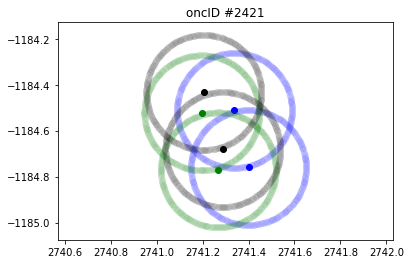

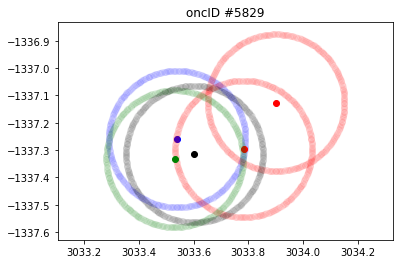

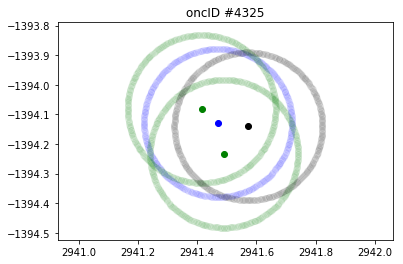

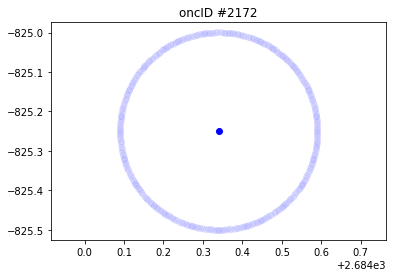

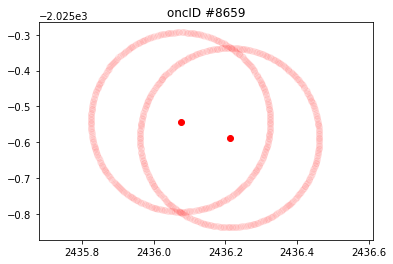

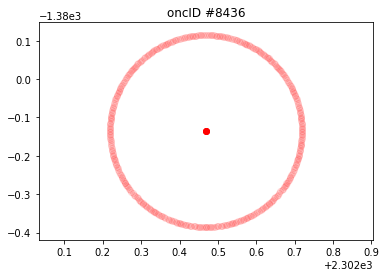

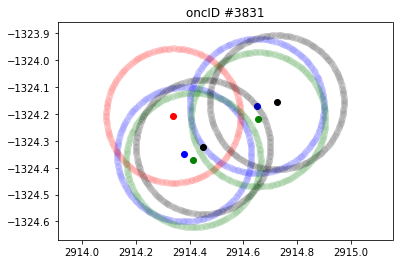

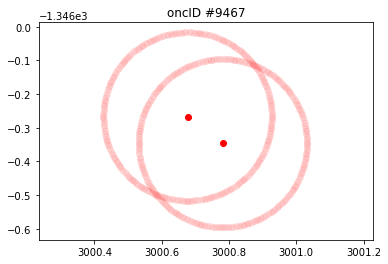

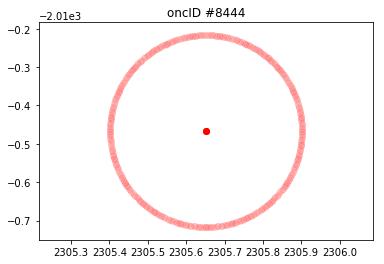

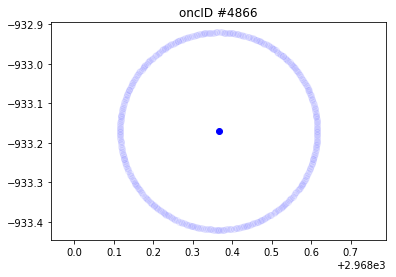

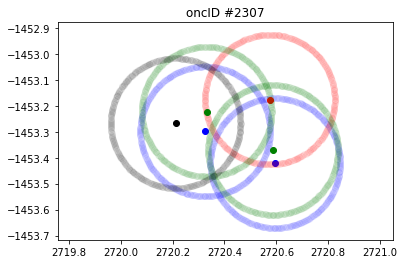

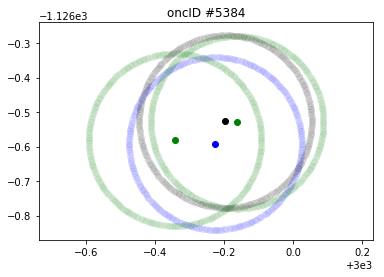

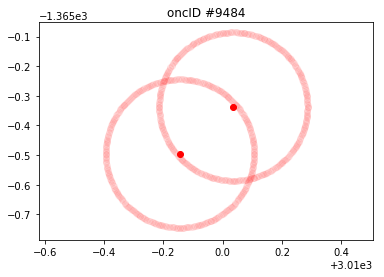

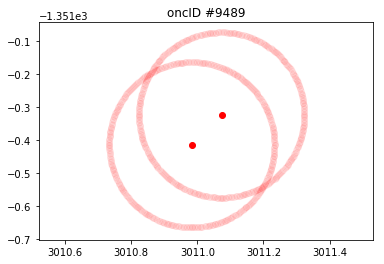

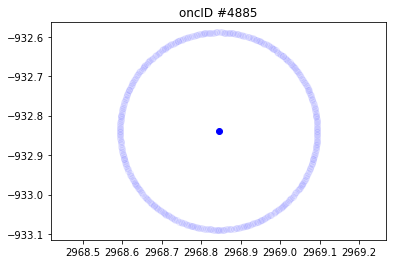

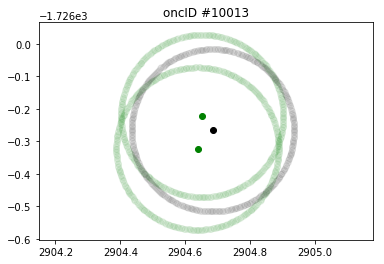

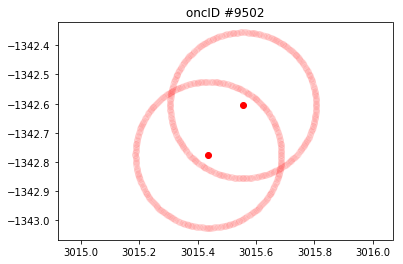

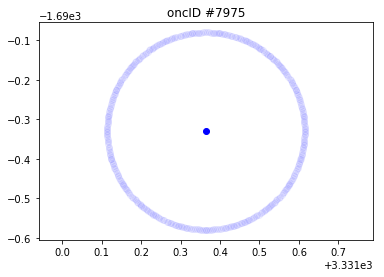

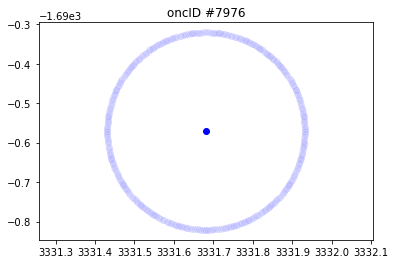

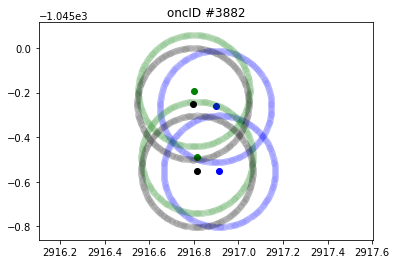

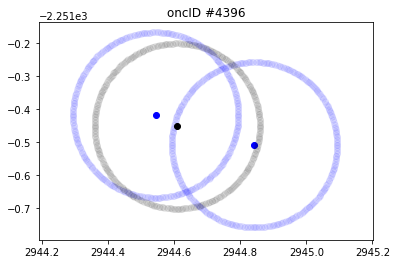

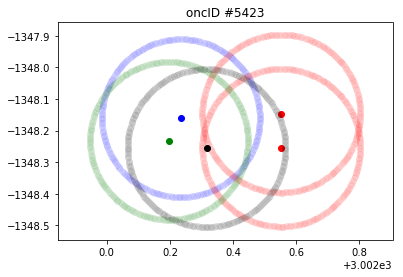

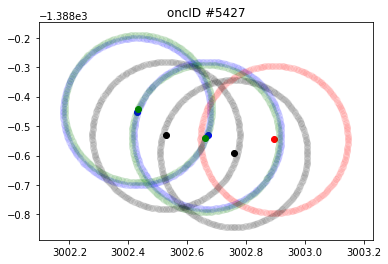

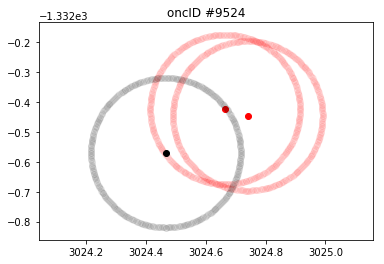

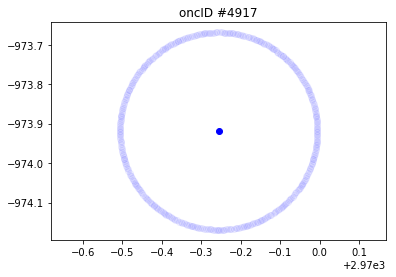

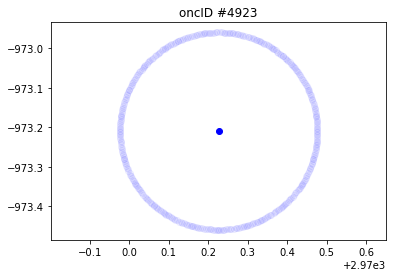

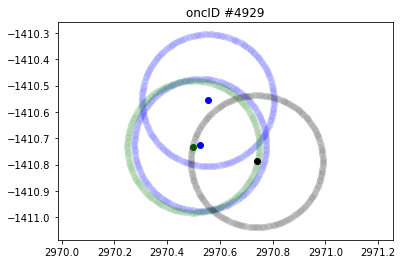

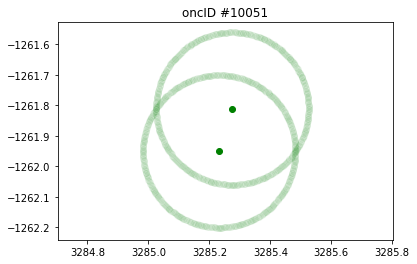

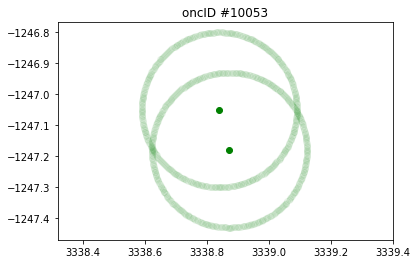

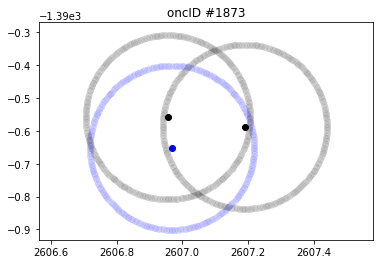

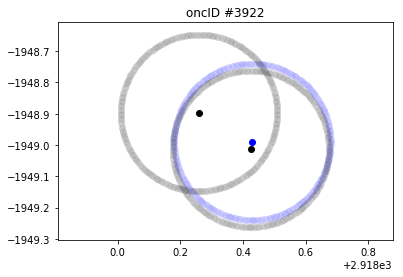

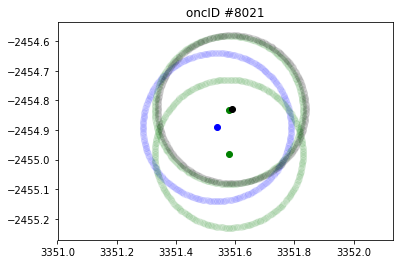

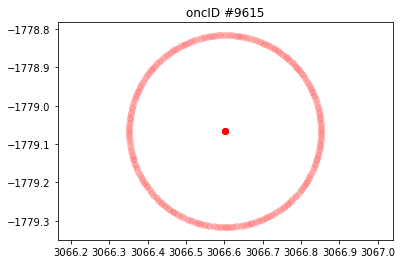

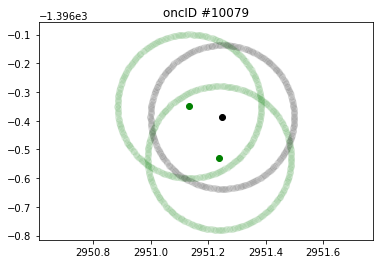

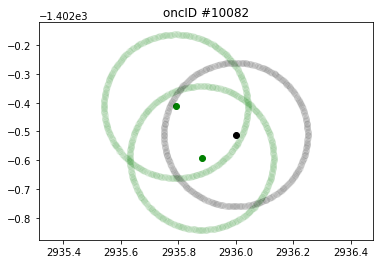

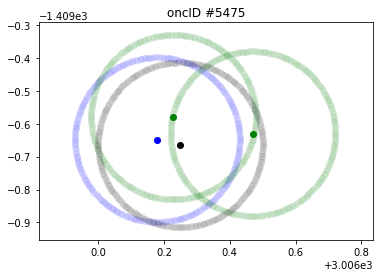

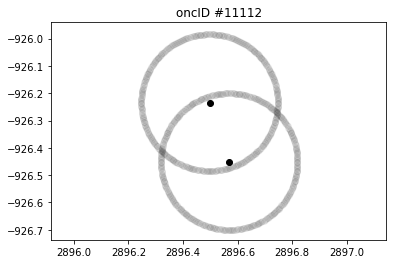

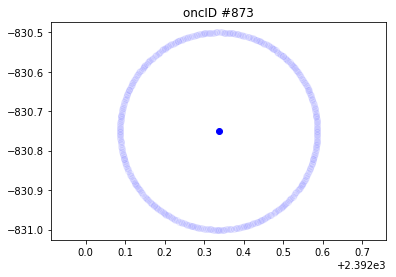

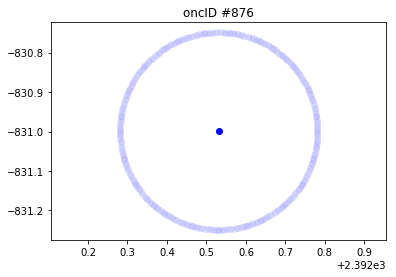

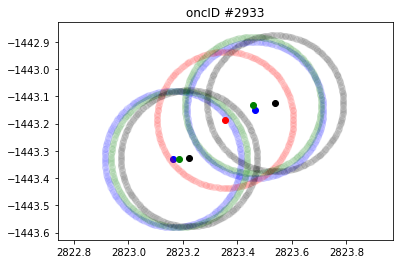

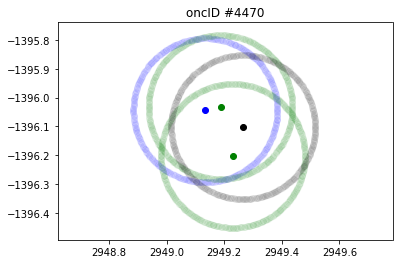

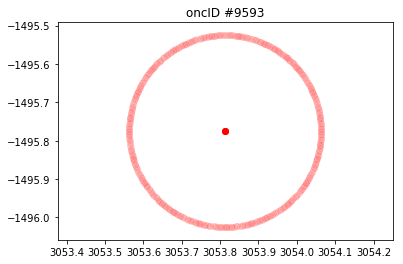

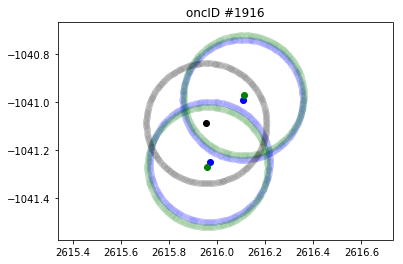

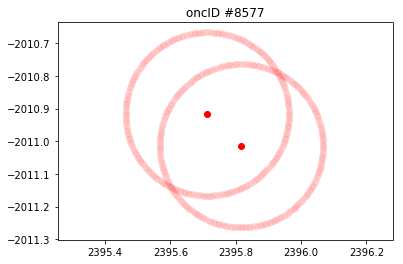

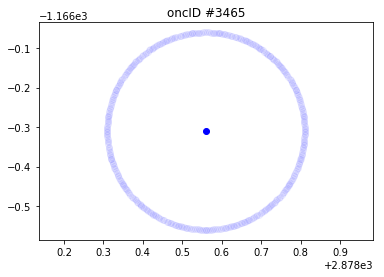

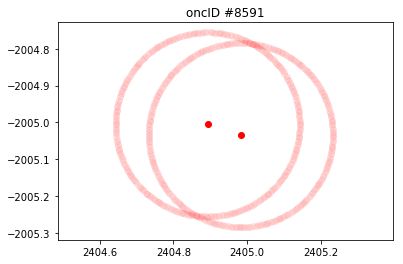

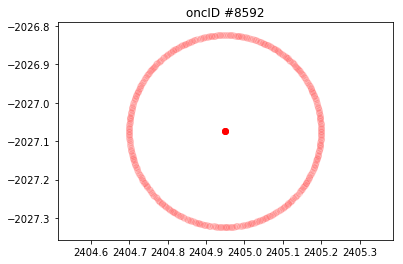

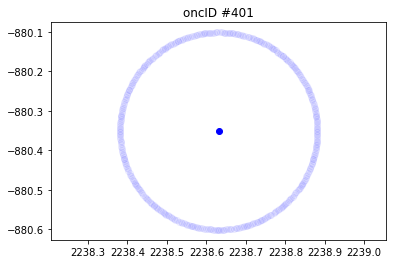

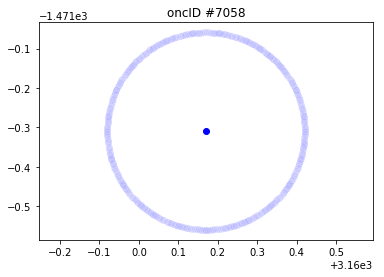

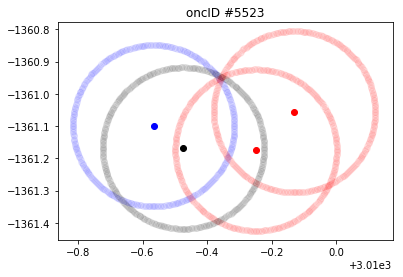

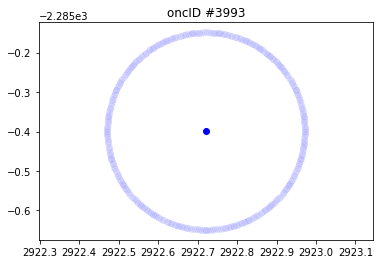

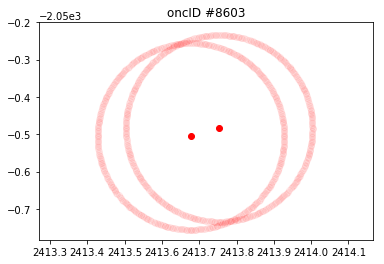

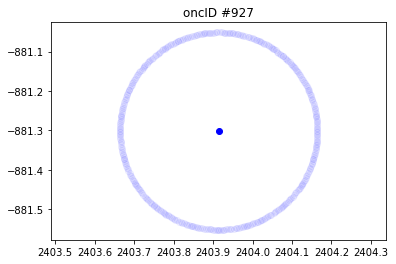

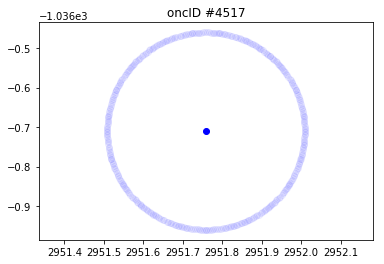

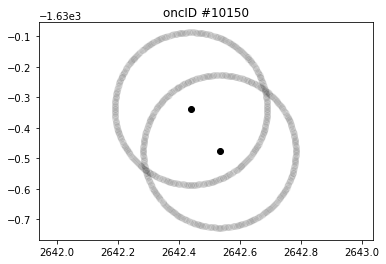

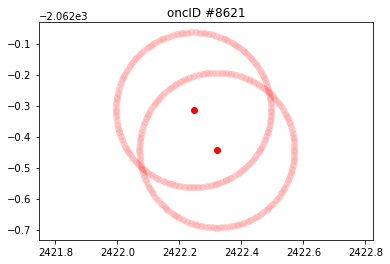

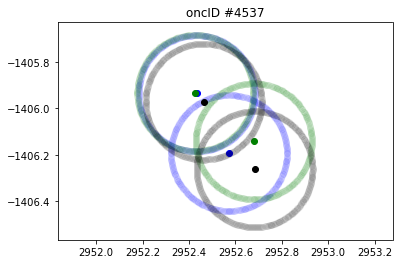

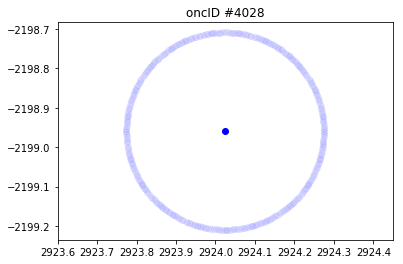

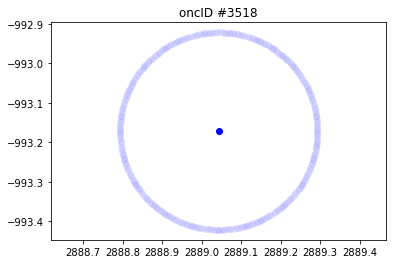

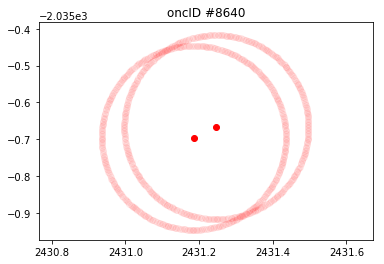

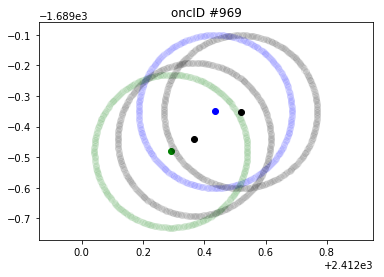

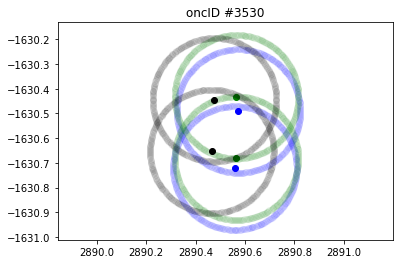

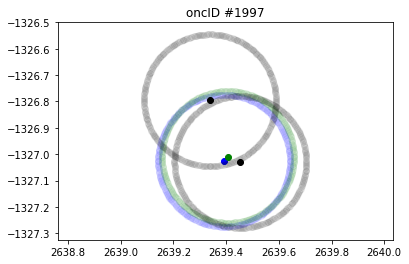

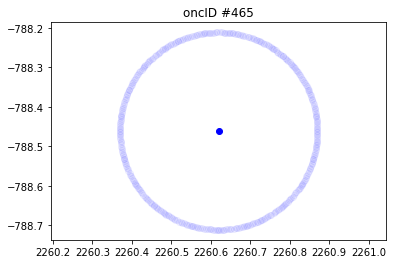

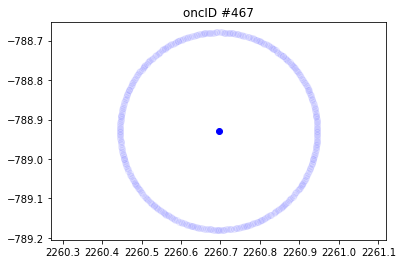

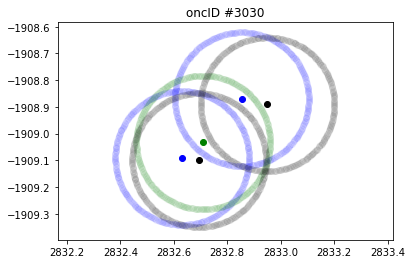

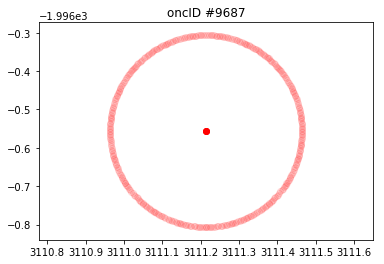

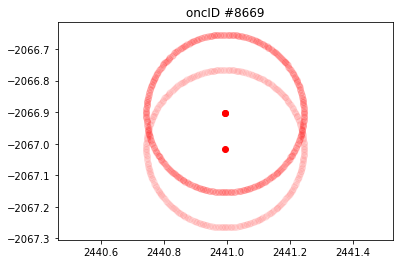

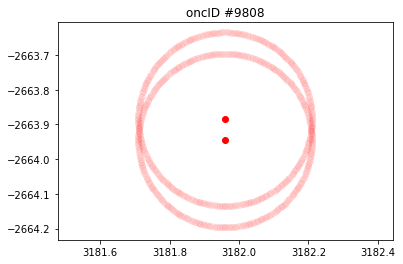

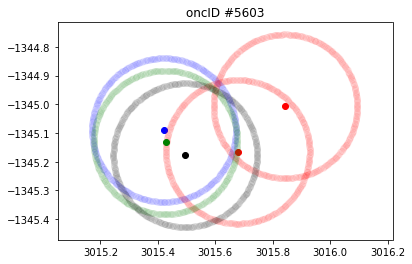

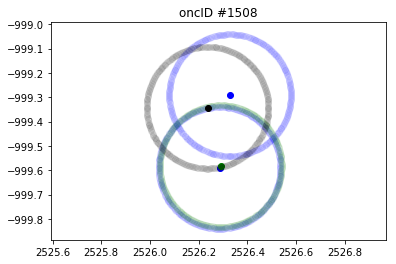

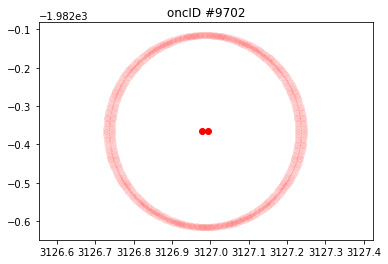

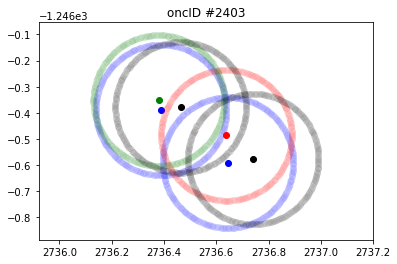

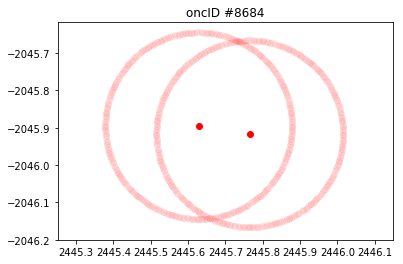

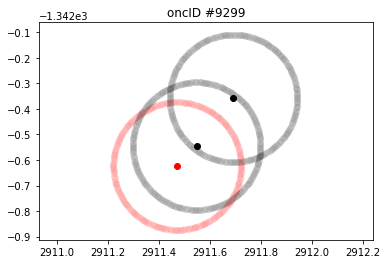

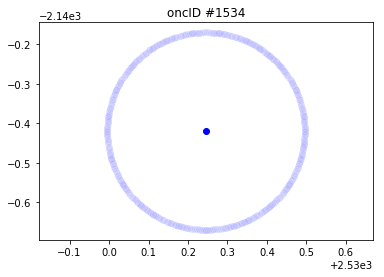

In [20]:
for thing in argh:
    meh = blah.loc[cat['id'] == thing].reset_index()
    
    # in arcsec...
    meh_ra = (meh.loc[:,'ra'] - 83.) * 3600.
    meh_de = (meh.loc[:,'dec'] + 5.) * 3600.

    '''
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)

    for i in range(len(meh_ra)):
        ax.scatter(meh_ra[i], meh_de[i], color=color_dict[meh['catname'][i]])

    ax.scatter([min(meh_ra)-1,max(meh_ra)+1],[min(meh_de)-1,max(meh_de)+1],color='white')

    ax.axis('equal')
    
    limits = ax.axis()
    '''
    
    # print limits

    # upright = ax.transData.transform((limits[1], limits[3]))
    # lowleft = ax.transData.transform((limits[0], limits[2]))

    # print upright, lowleft

    # x_pix_ratio = (upright[0] - lowleft[0]) / (limits[1] - limits[0])
    # y_pix_ratio = (upright[1] - lowleft[1]) / (limits[3] - limits[2])

    # print x_to_pix_ratio, y_to_pix_ratio

    for i in range(len(meh_ra)):
        plt.scatter(meh_ra[i], meh_de[i], color=color_dict[meh['catname'][i]])
        plt.scatter(meh_ra[i]+costheta, meh_de[i]+sintheta, color=color_dict[meh['catname'][i]], alpha=0.05)

    # plt.xlim((min(meh_ra)-1,max(meh_ra)+1))
    # plt.ylim((min(meh_de)-1,max(meh_de)+1))
    
    plt.axis('equal')
    
    plt.title('oncID #' + str(int(thing)))

    plt.show()
    
    # plt.savefig(root + 'source_groups/' + str(int(thing)) + '.png', format='png')